In [1]:
import numpy as np
from ipycanvas import Canvas
import sys
sys.path.append('/home/cosmo/Documents/projects/coreli')
from coreli import *
import copy

In [55]:
def get_segments_initiaux(compact):
    if len(compact) == 1:
        return [[[0,0] for _ in range(compact[0]+1)]]
    segments = [[[0,0]]*(e+1) for e in compact]
    choice = [[1,1],[0,1]]
    for seg in segments[::-1][:-1]:
        for i in range(len(seg)):
            seg[i] = choice[i%2]
    segments[0][0] = segments[-1][-1]
    o = 0
    if segments[0][0] == [1,1]:
        o = 1
    for i in range(0,len(segments[0])-1):
        segments[0][i+1] = choice[(i+o)%2] 
    return segments

def deduce(south, east):
    bit = 1-int(sum(east)%2 == south[0])
    carry = int(bit + sum(east) >= 2)
    return [bit, carry]

def get_next_segments(segments):
    if len(segments) == 1:
        return segments
    next_segments = copy.deepcopy(segments)
    for i in range(len(segments)-1,0,-1):
        seg = next_segments[i]
        for j in range(len(seg)):
            right_neigh = segments[i-1][-1]
            if j != 0:
                right_neigh = seg[j-1]
            seg[j] = deduce(segments[i][j],right_neigh)
    next_segments[0][0] = next_segments[-1][-1]
    seg = next_segments[0]
    for j in range(1,len(seg)):
        seg[j] = deduce(segments[0][j],seg[j-1])
    return next_segments

def segments_to_letters(segments):
    letters = ['B','A','C','D']
    to_return = ""
    for seg in segments:
        for e in seg:
            to_return += letters[2*e[0]+e[1]]
    return to_return[::-1]

def get_trace(compact):
    init = get_segments_initiaux(compact)
    trace = [init]
    for k in range(2):
        seen = {}
        while not segments_to_letters(trace[-1]) in seen:
            seen[segments_to_letters(trace[-1])] = True
            trace.append(get_next_segments(trace[-1]))
    return trace

def get_trace_str(trace):
    to_return = ""
    i = 0
    seen = {}
    for segments in trace[::-1]:
        to_add = segments_to_letters(segments)
        if to_add in seen:
            to_add += '*'
        seen[to_add] = True
        to_return += to_add
        if i != len(trace)-1:
            to_return += "\n"
        i += 1
    return to_return

In [26]:
from ipycanvas import Canvas

In [28]:
t = get_trace((2,3,0,1,0))

In [61]:
sum((2,3,0,1,0))

6

In [3]:
def get_s_of_trace(t):
    s = []
    for seg in t[0]:
        s.append(len(seg)-1)
    return CompactRep(tuple(s))

In [4]:
p = Parvec.get_random_parvec()[0]
s = p.to_compact()

In [5]:
def s_type(s):
    return 2**(s.norm) >= 3**(s.span)

In [20]:
def char_of_cell(elem):
    c = '.' if elem[1] == 1 else ' '
    b = str(elem[0])
    return c+b

def draw_trace(t, o_y = 0, o_x = 0):
    cell_w, cell_h = 20, 20
    s_t = get_s_of_trace(t)
    n = len(t)
    canvas = Canvas(width=4*n*cell_w+o_x*cell_w, height=(n+n//2+1+o_y)*cell_h)
    canvas.font = '20px serif'
    canvas.fill_style = 'white'
    
    for i in range(n):
        segments = t[i]
        x = 0
        y = (n//2+n+1+o_y)*cell_h-i*cell_h
        for j,seg in enumerate(segments[::-1]):
            for elem in seg[::-1]:
                canvas.fill_text(char_of_cell(elem),x,y)
                x += 2*cell_w
            y -= cell_h
        
            
    
    return canvas

In [56]:
s = (0,0,1,1)
t = get_trace(s)

In [57]:
t

[[[[0, 1]], [[1, 1]], [[1, 1], [0, 1]], [[1, 1], [0, 1]]],
 [[[0, 0]], [[0, 0]], [[1, 1], [0, 1]], [[0, 0], [0, 0]]],
 [[[0, 1]], [[0, 0]], [[1, 0], [1, 1]], [[1, 1], [0, 1]]],
 [[[0, 1]], [[1, 1]], [[1, 0], [0, 0]], [[1, 1], [0, 1]]],
 [[[1, 1]], [[0, 0]], [[1, 1], [0, 1]], [[1, 0], [1, 1]]],
 [[[1, 0]], [[0, 1]], [[1, 0], [1, 1]], [[0, 0], [1, 0]]],
 [[[0, 0]], [[1, 1]], [[0, 0], [1, 0]], [[0, 1], [0, 0]]],
 [[[0, 1]], [[1, 0]], [[0, 1], [0, 0]], [[1, 1], [0, 1]]],
 [[[1, 1]], [[0, 0]], [[1, 1], [0, 1]], [[1, 0], [1, 1]]],
 [[[1, 0]], [[0, 1]], [[1, 0], [1, 1]], [[0, 0], [1, 0]]],
 [[[0, 0]], [[1, 1]], [[0, 0], [1, 0]], [[0, 1], [0, 0]]],
 [[[0, 1]], [[1, 0]], [[0, 1], [0, 0]], [[1, 1], [0, 1]]],
 [[[1, 1]], [[0, 0]], [[1, 1], [0, 1]], [[1, 0], [1, 1]]]]

In [58]:
draw_trace(t)

Canvas(height=400, width=1040)

In [59]:
import numpy as np

In [60]:
def get_color_mat(trace):
    s_t = get_s_of_trace(t)
    height = len(trace) + s_t.span
    width = s_t.norm+1
    parvec = s_t.to_parvec().parvec
    parvec += [parvec[0]]
    parvec = parvec[::-1]
    mat = np.array([[0 for _ in range(width)] for _ in range(height)], dtype=np.int64)
    
    y = height-1 
    x = 0
    for segment in trace[0][::-1]:
        for elem in segment[::-1]:
            if sum(elem)%2 != parvec[x]:
                mat[y,x] = 1
            x += 1
        y -= 1
    y_start = height-2
    for iter_ in trace[1:]:
        x = 0
        y = y_start
        for segment in iter_[::-1]:
            for elem in segment[::-1]:
                mat[y,x] = (sum(elem)+mat[y+1,x])%2
                x += 1
            y -= 1

        y_start -= 1
    
    return mat

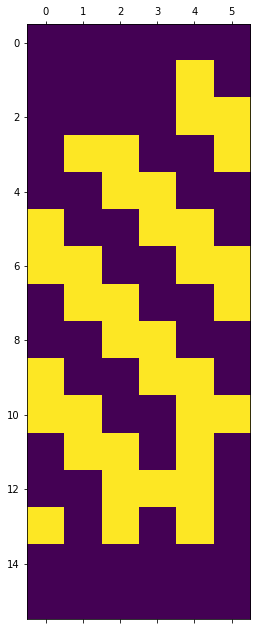

In [61]:
mat = get_color_mat(t)
plt.matshow(mat)

In [63]:
mat = get_color_mat(get_trace((0,2,1,0)))
plt.matshow(mat)

IndexError: list index out of range

In [53]:
mat

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 1],
       [0, 1, 1, 0, 0, 1],
       [0, 0, 1, 1, 0, 0],
       [1, 0, 0, 1, 1, 0],
       [1, 1, 0, 0, 1, 1],
       [0, 1, 1, 0, 1, 0],
       [0, 0, 1, 1, 1, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [45]:
import matplotlib.pyplot as plt

In [37]:
t[0][2]

[[1, 1], [0, 1]]

In [34]:
get_s_of_trace(t).to_parvec().parvec

[1, 1, 0, 1, 0]